In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import shapefile as shp
import seaborn as sns

#https://www.currentresults.com/Weather/US/average-annual-state-temperatures.php

In [2]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [3]:
popu = pd.read_csv("USA STATEWISE POPULATION.csv")
cases = pd.read_csv("us-states.csv")
temp = pd.read_csv("State Temp.csv")
popu.head()
print (temp)

        State Name      type
0          Alabama       Hot
1           Alaska      Cold
2          Arizona       Hot
3         Arkansas  Moderate
4       California  Moderate
5         Colorado      Cold
6      Connecticut      Cold
7         Delaware      Cold
8          Florida       Hot
9          Georgia       Hot
10          Hawaii       Hot
11           Idaho      Cold
12        Illinois      Cold
13         Indiana      Cold
14            Iowa      Cold
15          Kansas  Moderate
16        Kentucky      Cold
17       Louisiana       Hot
18           Maine      Cold
19        Maryland      Cold
20   Massachusetts      Cold
21        Michigan      Cold
22       Minnesota      Cold
23        Missouri  Moderate
24         Montana      Cold
25        Nebraska  Moderate
26          Nevada  Moderate
27   New Hampshire      Cold
28      New Jersey      Cold
29      New Mexico  Moderate
30        New York      Cold
31  North Carolina      Cold
32    North Dakota      Cold
33            

In [4]:
cases['date'] = pd.to_datetime(cases['date'])
#cases[cases.groupby('state').date.transform('max') == cases['date']]
casesnew = cases[cases.groupby('state').date.transform('max') == cases['date']]
casesnew.head()

,date,state,fips,cases,deaths
49,2020-05-01,Alabama,1,7294,289
100,2020-05-01,Alaska,2,362,7
197,2020-05-01,Arizona,4,7962,330
249,2020-05-01,Arkansas,5,3310,64
347,2020-05-01,California,6,52318,2147


In [5]:
mergeddf = popu.merge(casesnew, left_on='NAME', right_on='state')
mergeddf.head()

,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS,date,state,fips,cases,deaths
0,Alabama,4903185,3814879,77.8,2020-05-01,Alabama,1,7294,289
1,Alaska,731545,551562,75.4,2020-05-01,Alaska,2,362,7
2,Arizona,7278717,5638481,77.5,2020-05-01,Arizona,4,7962,330
3,Arkansas,3017804,2317649,76.8,2020-05-01,Arkansas,5,3310,64
4,California,39512223,30617582,77.5,2020-05-01,California,6,52318,2147


In [7]:
mergeddf = mergeddf [['date','state','POPESTIMATE2019', 'cases', 'deaths']]
#mergeddf.sort_values('deaths',ascending=False)
mergeddf.head()


,date,state,POPESTIMATE2019,cases,deaths
0,2020-05-01,Alabama,4903185,7294,289
1,2020-05-01,Alaska,731545,362,7
2,2020-05-01,Arizona,7278717,7962,330
3,2020-05-01,Arkansas,3017804,3310,64
4,2020-05-01,California,39512223,52318,2147


In [8]:
mergeddf ['Cases Per Capita'] = mergeddf['cases']/mergeddf['POPESTIMATE2019']
mergeddf ['deaths Per Capita'] = mergeddf['cases']/mergeddf['POPESTIMATE2019']*100
#mergeddf['Cases Per Capita']= Cases Per Capita
#mergeddf['deaths Per Capita']=deaths Per Capita
mergeddf.round({'Cases Per Capita': 2, 'deaths Per Capita':2} )
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita
0,2020-05-01,Alabama,4903185,7294,289,0.001488,0.148760
1,2020-05-01,Alaska,731545,362,7,0.000495,0.049484
2,2020-05-01,Arizona,7278717,7962,330,0.001094,0.109387
3,2020-05-01,Arkansas,3017804,3310,64,0.001097,0.109682
4,2020-05-01,California,39512223,52318,2147,0.001324,0.132410


In [9]:
mergeddf.sort_values(by=['Cases Per Capita', 'deaths Per Capita'],ascending=False)
mergeddf=mergeddf.round(2)
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita
0,2020-05-01,Alabama,4903185,7294,289,0.0,0.15
1,2020-05-01,Alaska,731545,362,7,0.0,0.05
2,2020-05-01,Arizona,7278717,7962,330,0.0,0.11
3,2020-05-01,Arkansas,3017804,3310,64,0.0,0.11
4,2020-05-01,California,39512223,52318,2147,0.0,0.13


KeyError: 'death %'

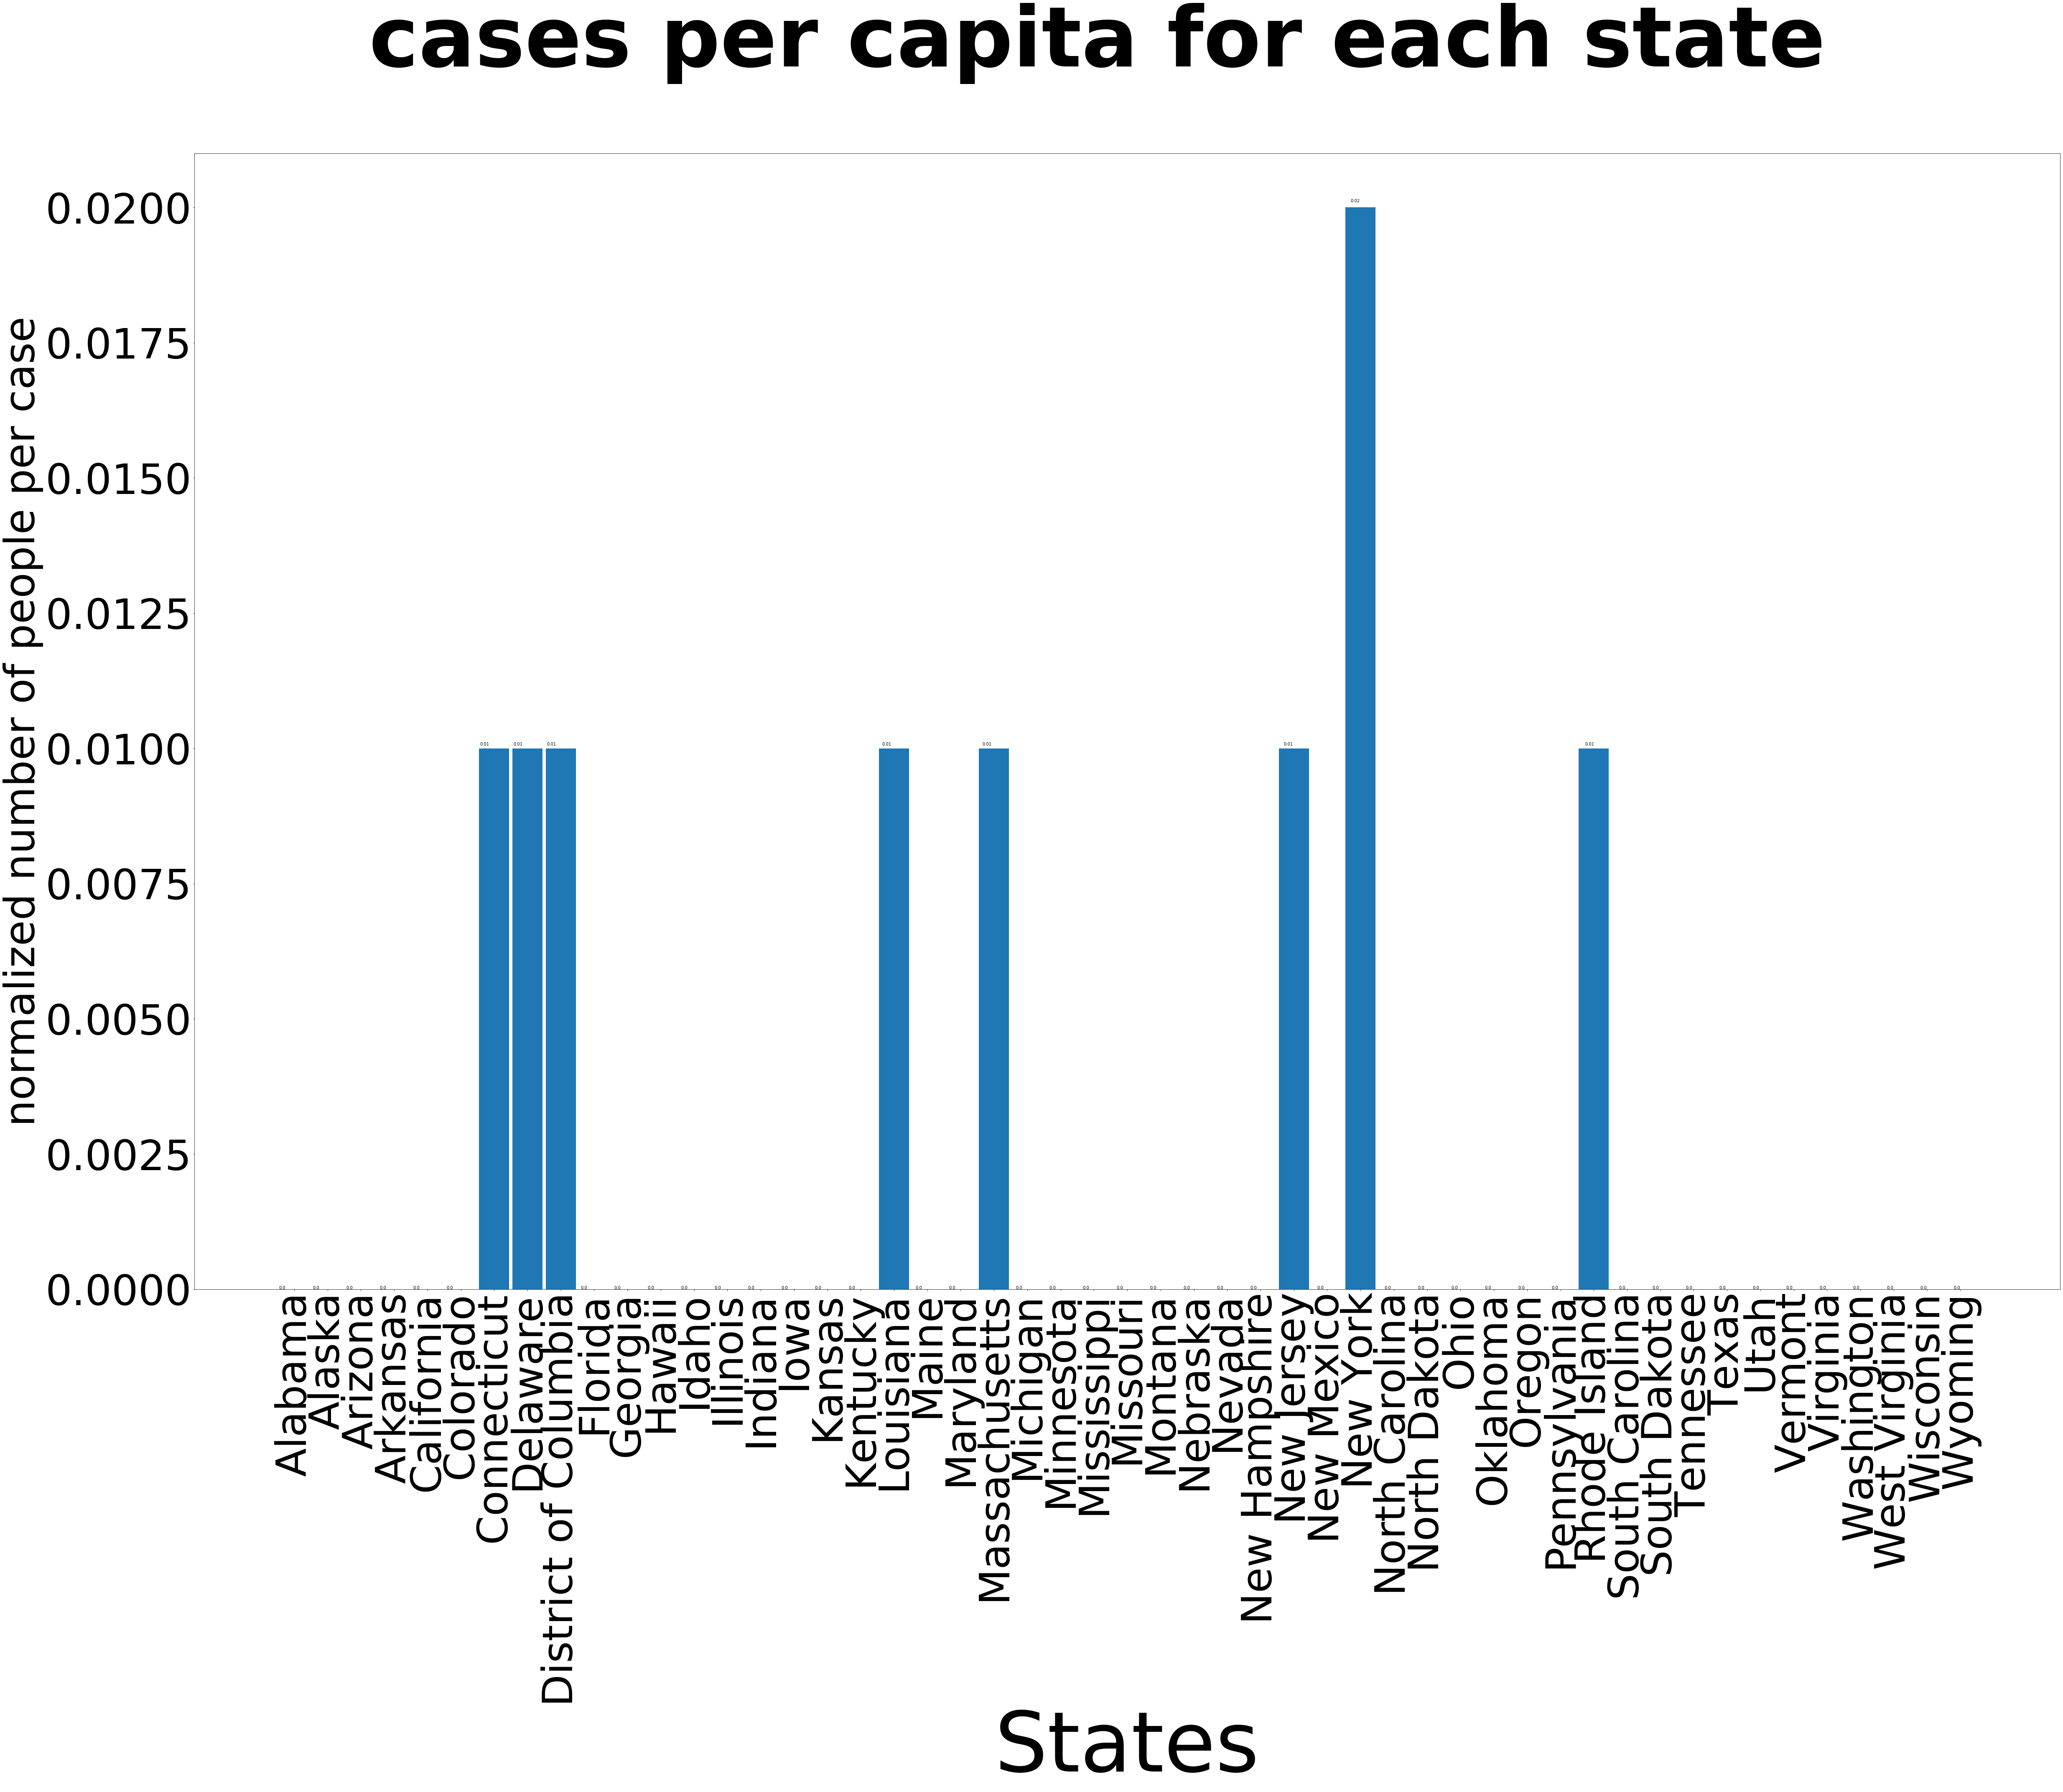

In [10]:

fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=200, fontweight='bold')

plt.xticks(fontsize=10, rotation=90)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.tick_params(axis='both', which='minor', labelsize=8)


ax.bar(mergeddf['state'], mergeddf['Cases Per Capita'],width = 0.9)
plt.xlabel('States', size = 200)
plt.ylabel('normalized number of people per case', size = 100)
#ax.set_xlabel('Cases Per Capita')
#ax.set_ylabel('State Names')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


variable = mergeddf['death %']
fig, ax = plt.subplots(1, figsize=(40, 6))
ax.plot(mergeddf['state'], variable)


#plt.xticks(fontsize=10, rotation=90)
#ax.tick_params(axis='both', which='major', labelsize=10)
#ax.tick_params(axis='both', which='minor', labelsize=8)


#ax.hexbin(mergeddf['state'], mergeddf['death %'],width =# 0.75)
#plt.xlabel('States', size = 20)
#plt.ylabel('Death %', size = 10)

fig.subplots_adjust(top=0.85)
ax.set_title('Figure')




# figsize = (12, 6)  #perameter

Text(0, 0.5, 'State Names')

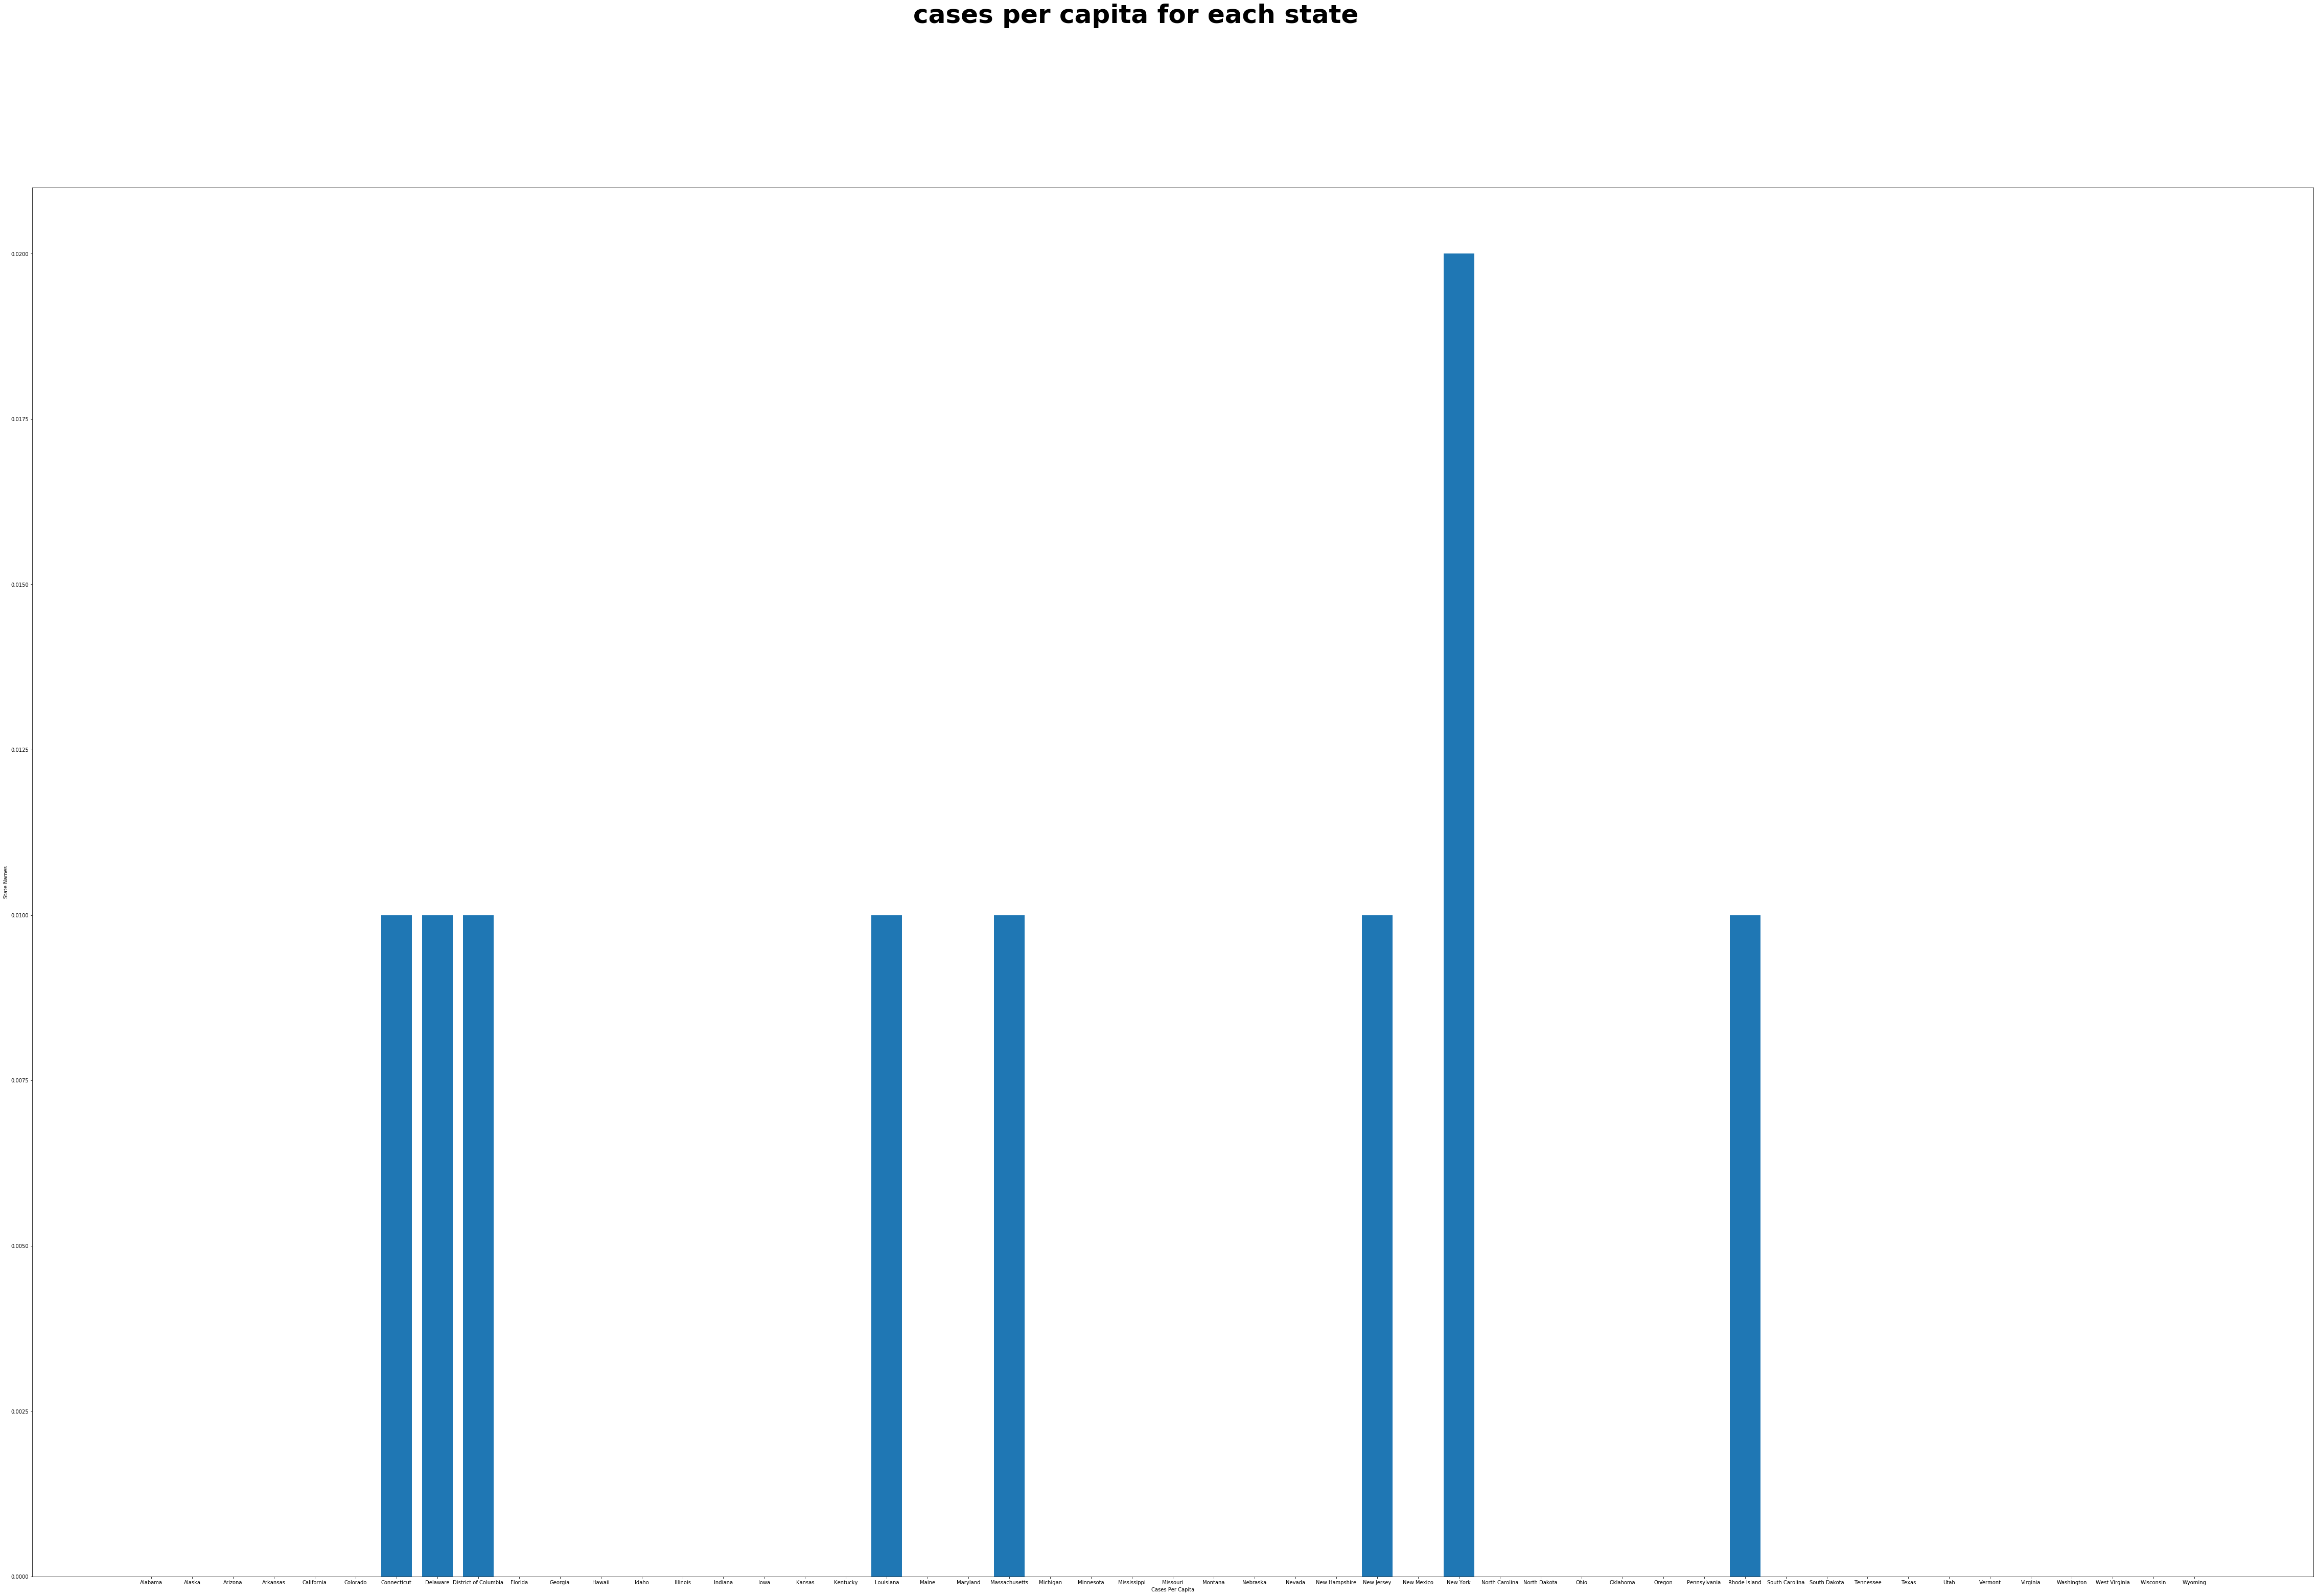

In [11]:

fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=50, fontweight='bold')


ax.bar(mergeddf['state'], mergeddf['Cases Per Capita'],width = 0.75)
ax.set_xlabel('Cases Per Capita')
ax.set_ylabel('State Names')


In [12]:
mergeddf['death %'] = 100 - (100* ((mergeddf['cases'] - mergeddf['deaths'])/mergeddf['cases']) )
mergeddf=mergeddf.round(2)

#mergeddf['recovery'] = 100*(mergeddf['deaths']/mergeddf['cases'])
print (mergeddf)

         date                 state  POPESTIMATE2019   cases  deaths  \
0  2020-05-01               Alabama          4903185    7294     289   
1  2020-05-01                Alaska           731545     362       7   
2  2020-05-01               Arizona          7278717    7962     330   
3  2020-05-01              Arkansas          3017804    3310      64   
4  2020-05-01            California         39512223   52318    2147   
5  2020-05-01              Colorado          5758736   15661     818   
6  2020-05-01           Connecticut          3565287   28764    2339   
7  2020-05-01              Delaware           973764    4918     159   
8  2020-05-01  District of Columbia           705749    4658     231   
9  2020-05-01               Florida         21477737   34720    1313   
10 2020-05-01               Georgia         10617423   26436    1153   
11 2020-05-01                Hawaii          1415872     610      16   
12 2020-05-01                 Idaho          1787065    1883    

## Hypothesis 2:
### the states with higher population will have higher spread compared to states with lower population

In [13]:
 mergeddf.nlargest(10, 'Cases Per Capita')
#print(mergeddf.nlargest(5, 'POPESTIMATE2019'))
#print (mergeddf.nlargest(5, 'death %'))

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %
32,2020-05-01,New York,19453561,308345,18610,0.02,1.59,6.04
6,2020-05-01,Connecticut,3565287,28764,2339,0.01,0.81,8.13
7,2020-05-01,Delaware,973764,4918,159,0.01,0.51,3.23
8,2020-05-01,District of Columbia,705749,4658,231,0.01,0.66,4.96
18,2020-05-01,Louisiana,4648794,28711,1927,0.01,0.62,6.71
21,2020-05-01,Massachusetts,6892503,64311,3716,0.01,0.93,5.78
30,2020-05-01,New Jersey,8882190,121190,7538,0.01,1.36,6.22
39,2020-05-01,Rhode Island,1059361,8962,279,0.01,0.85,3.11
0,2020-05-01,Alabama,4903185,7294,289,0.00,0.15,3.96
1,2020-05-01,Alaska,731545,362,7,0.00,0.05,1.93


### Conclusion:
### there is no correlation between the population of the place and community spread of COVID-19



In [14]:
mergeddf.sort_values(by=['Cases Per Capita', 'deaths Per Capita'],ascending=False)

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %
32,2020-05-01,New York,19453561,308345,18610,0.02,1.59,6.04
30,2020-05-01,New Jersey,8882190,121190,7538,0.01,1.36,6.22
21,2020-05-01,Massachusetts,6892503,64311,3716,0.01,0.93,5.78
39,2020-05-01,Rhode Island,1059361,8962,279,0.01,0.85,3.11
6,2020-05-01,Connecticut,3565287,28764,2339,0.01,0.81,8.13
8,2020-05-01,District of Columbia,705749,4658,231,0.01,0.66,4.96
18,2020-05-01,Louisiana,4648794,28711,1927,0.01,0.62,6.71
7,2020-05-01,Delaware,973764,4918,159,0.01,0.51,3.23
13,2020-05-01,Illinois,12671821,56055,2464,0.00,0.44,4.40
22,2020-05-01,Michigan,9986857,42348,3866,0.00,0.42,9.13


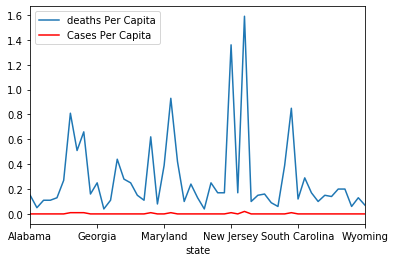

In [15]:
ax = plt.gca()

mergeddf.plot(kind='line',x='state',y='deaths Per Capita',ax=ax)
mergeddf.plot(kind='line',x='state',y='Cases Per Capita', color='red', ax=ax)

plt.show()

In [16]:
shapefile = 'cb_2018_us_state_500k.shp'
gdf = gp.read_file(shapefile)[['NAME', 'STUSPS','geometry']]

gdf.head()

,NAME,STUSPS,geometry
0,Mississippi,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,North Carolina,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,Oklahoma,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,Virginia,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,West Virginia,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


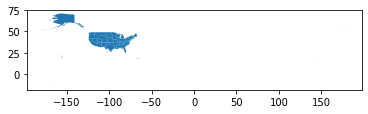

In [17]:
gdf.plot()
#scale decrease

In [18]:
mergeddf = mergeddf.merge(gdf, left_on='state', right_on='NAME')
mergeddf.head()

,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %,NAME,STUSPS,geometry
0,2020-05-01,Alabama,4903185,7294,289,0.0,0.15,3.96,Alabama,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,2020-05-01,Alaska,731545,362,7,0.0,0.05,1.93,Alaska,AK,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
2,2020-05-01,Arizona,7278717,7962,330,0.0,0.11,4.14,Arizona,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,2020-05-01,Arkansas,3017804,3310,64,0.0,0.11,1.93,Arkansas,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,2020-05-01,California,39512223,52318,2147,0.0,0.13,4.10,California,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [19]:
#mergeddf.date = pd.to_datetime(mergeddf.date)
#mergeddf.set_index('state', inplace=True)

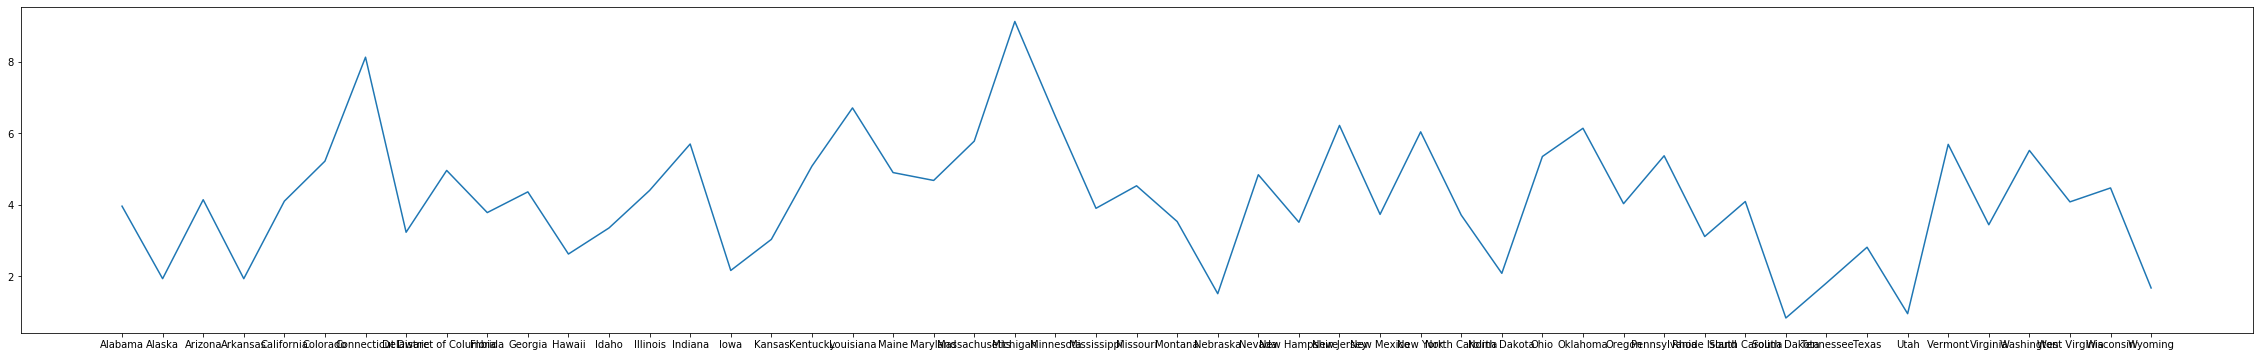

In [20]:
variable = mergeddf['death %']
fig, ax = plt.subplots(1, figsize=(40, 6))
ax.plot(mergeddf['state'], variable)



In [22]:
# set a variable that will call whatever column we want to visualise on the map
#variable = df['death %']
# set the range for the choropleth
#vmin, vmax = 500, 500
# create figure and axes for Matplotlib
#fig, ax = plt.subplots(1, figsize=(10, 6))

#mergeddf.plot( variable , cmap = 'BuGn', linewidth = 1, ax=ax)

#mergeddf.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')

In [38]:
# remove the axis
ax.axis('off')
# add a title
ax.set_title('cases per capita by states', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: CDC',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
            
            
            

Text(0.1, 0.08, 'Source: CDC')

## Hypothesis 1
### States with lower temprature have lower cases per capita of COVID-19

In [23]:
mergeddf = temp.merge(mergeddf, left_on='State Name', right_on='state')
mergeddf.set_index ('state')
print(mergeddf)

        State Name      type       date           state  POPESTIMATE2019  \
0          Alabama       Hot 2020-05-01         Alabama          4903185   
1           Alaska      Cold 2020-05-01          Alaska           731545   
2          Arizona       Hot 2020-05-01         Arizona          7278717   
3         Arkansas  Moderate 2020-05-01        Arkansas          3017804   
4       California  Moderate 2020-05-01      California         39512223   
5         Colorado      Cold 2020-05-01        Colorado          5758736   
6      Connecticut      Cold 2020-05-01     Connecticut          3565287   
7         Delaware      Cold 2020-05-01        Delaware           973764   
8          Florida       Hot 2020-05-01         Florida         21477737   
9          Georgia       Hot 2020-05-01         Georgia         10617423   
10          Hawaii       Hot 2020-05-01          Hawaii          1415872   
11           Idaho      Cold 2020-05-01           Idaho          1787065   
12        Il

In [24]:

h1 = (mergeddf.groupby('type'))
h1.head()

,State Name,type,date,state,POPESTIMATE2019,cases,deaths,Cases Per Capita,deaths Per Capita,death %,NAME,STUSPS,geometry
0,Alabama,Hot,2020-05-01,Alabama,4903185,7294,289,0.00,0.15,3.96,Alabama,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,Cold,2020-05-01,Alaska,731545,362,7,0.00,0.05,1.93,Alaska,AK,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
2,Arizona,Hot,2020-05-01,Arizona,7278717,7962,330,0.00,0.11,4.14,Arizona,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,Moderate,2020-05-01,Arkansas,3017804,3310,64,0.00,0.11,1.93,Arkansas,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,Moderate,2020-05-01,California,39512223,52318,2147,0.00,0.13,4.10,California,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
5,Colorado,Cold,2020-05-01,Colorado,5758736,15661,818,0.00,0.27,5.22,Colorado,CO,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
6,Connecticut,Cold,2020-05-01,Connecticut,3565287,28764,2339,0.01,0.81,8.13,Connecticut,CT,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
7,Delaware,Cold,2020-05-01,Delaware,973764,4918,159,0.01,0.51,3.23,Delaware,DE,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
8,Florida,Hot,2020-05-01,Florida,21477737,34720,1313,0.00,0.16,3.78,Florida,FL,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."
9,Georgia,Hot,2020-05-01,Georgia,10617423,26436,1153,0.00,0.25,4.36,Georgia,GA,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."


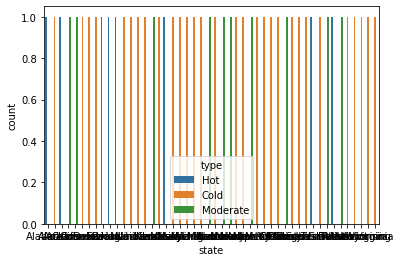

In [25]:
sns.countplot(x = 'state', data = mergeddf, hue = 'type')

Text(0, 0.5, 'State Names')

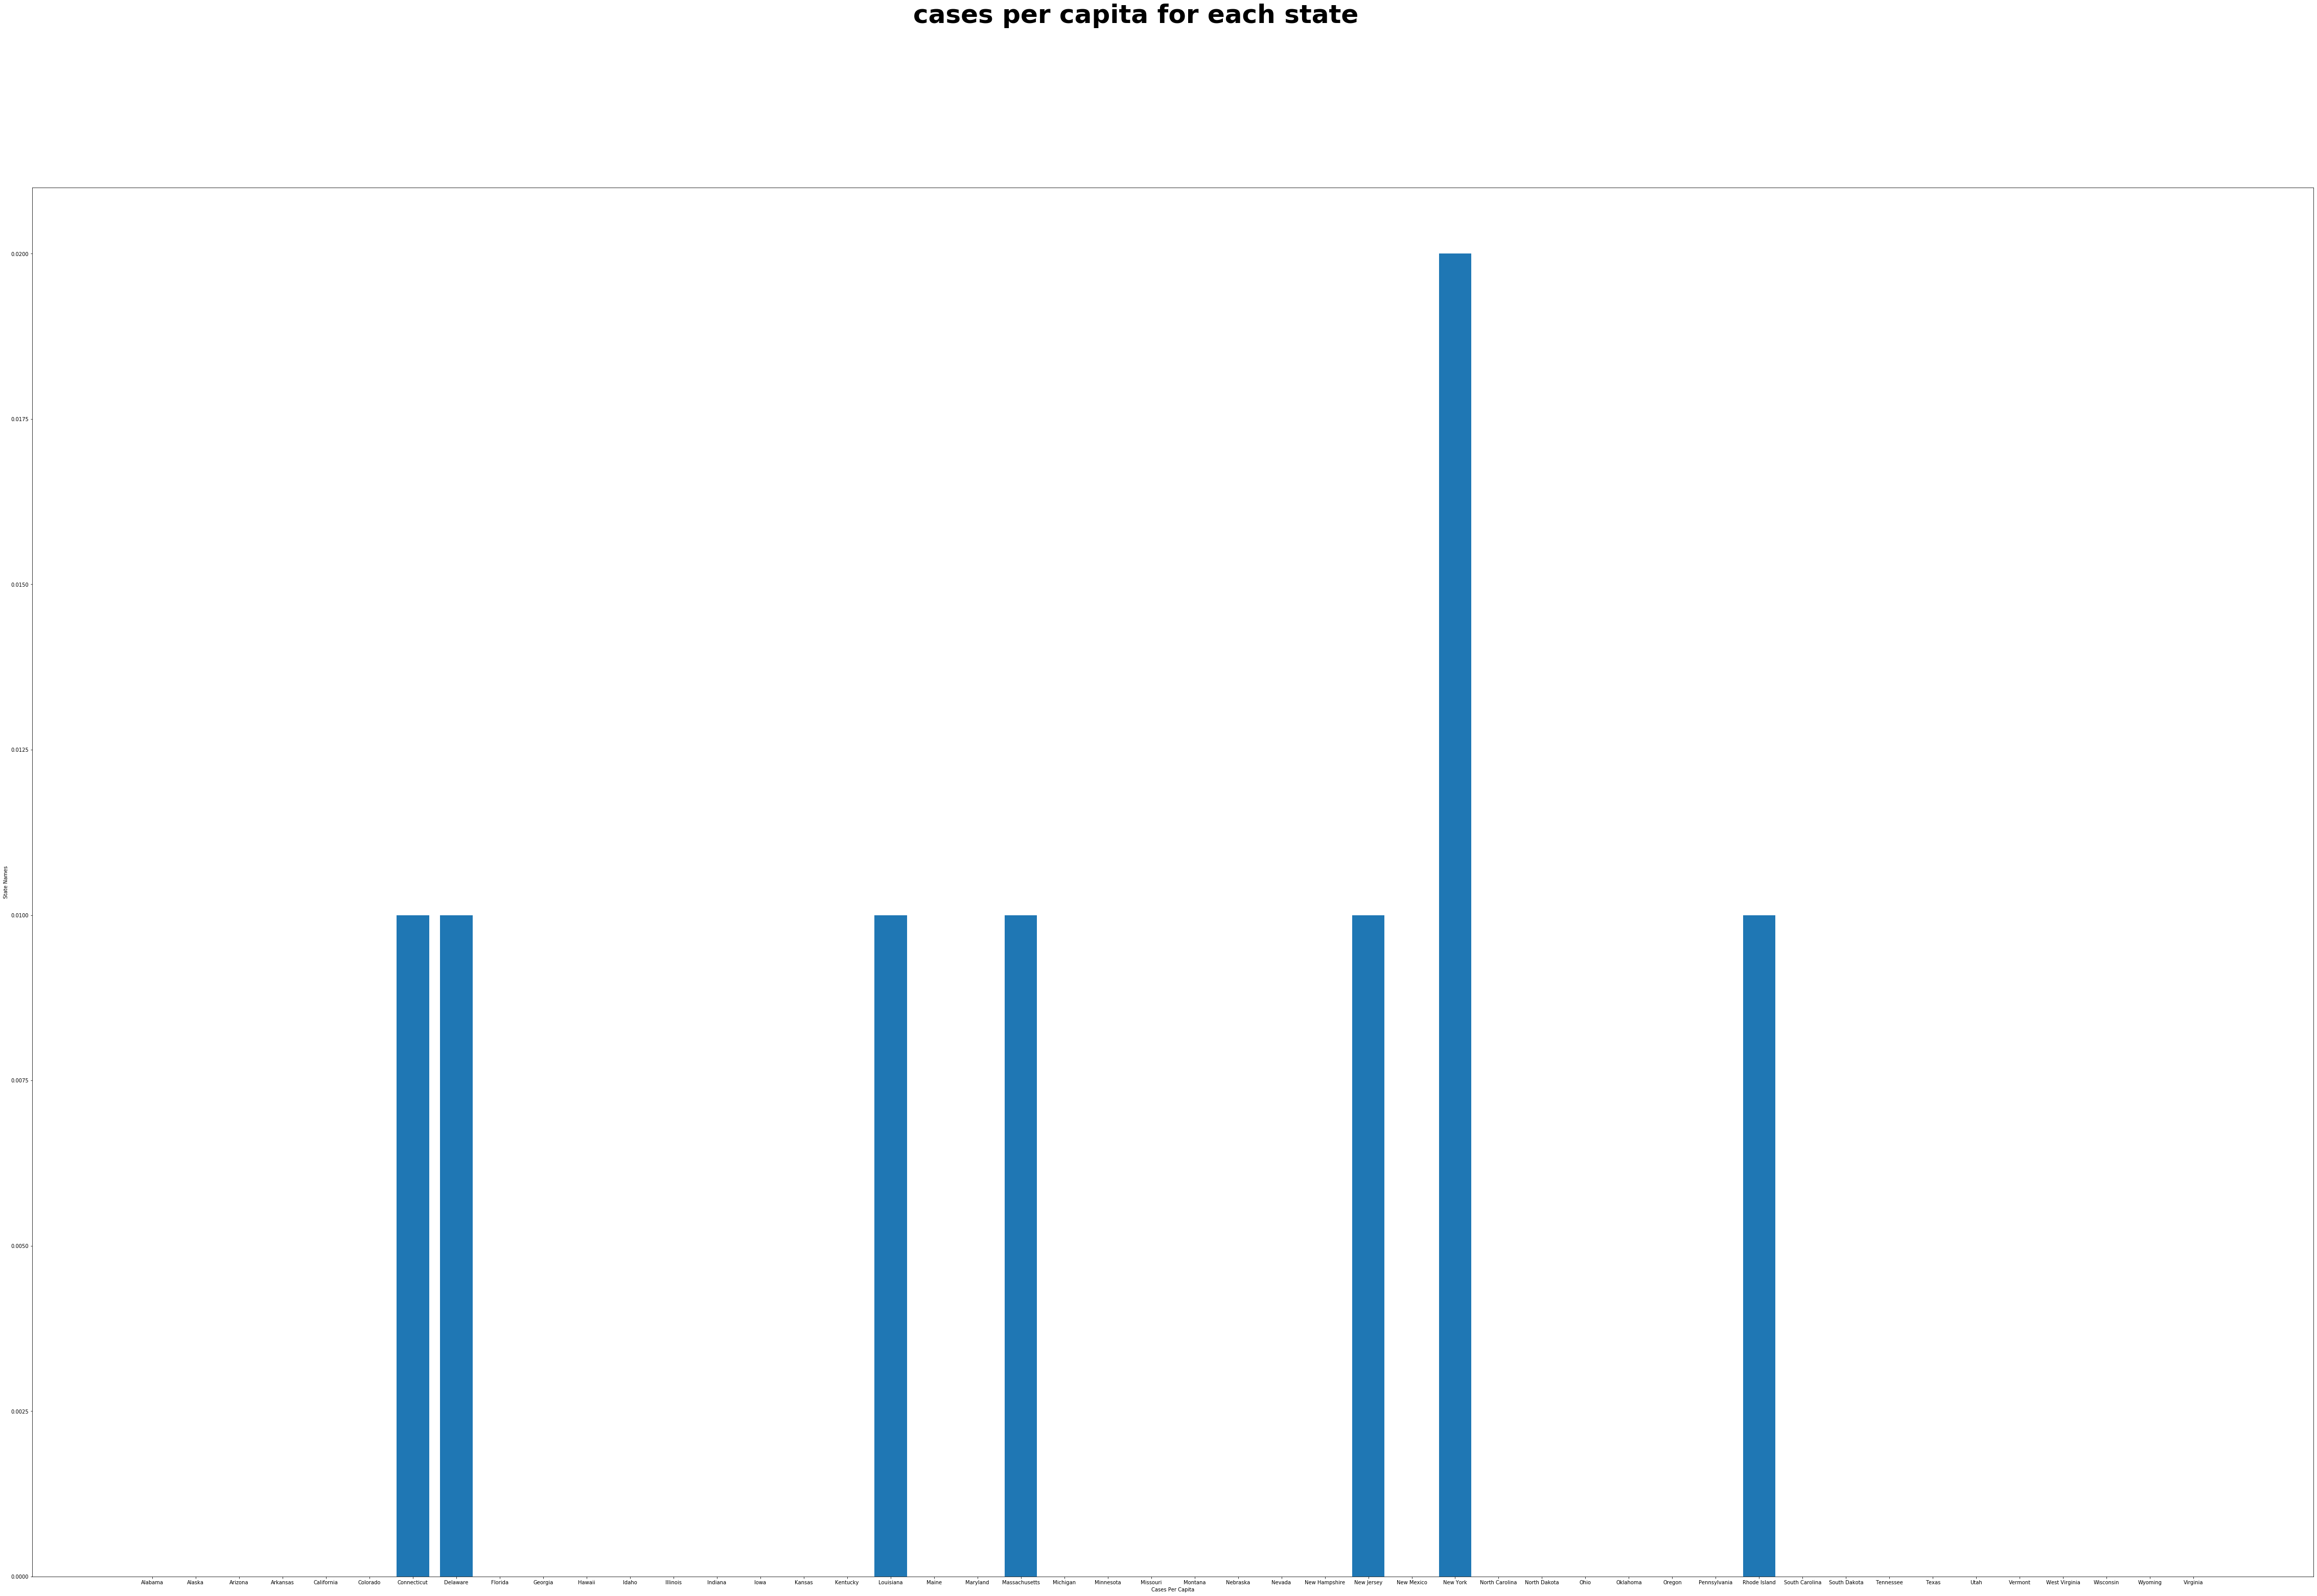

In [26]:
fig, ax = plt.subplots(1, figsize=(80, 50))
fig.suptitle('cases per capita for each state', fontsize=50, fontweight='bold')


ax.bar(mergeddf['state'], mergeddf['Cases Per Capita'],width = 0.75)
ax.set_xlabel('Cases Per Capita')
ax.set_ylabel('State Names')


### From the Graph we can see that the top 10 states with highest cases are as follows
#### montana Cold
#### hawaii Hot
#### alaska Cold
#### oregon Cold
#### west virgina Cold
#### wyoming Cold
#### maine Cold
#### oklahoma Moderate
#### Minnesota Cold
#### Nort Carolina Moderate

### 7 out of the top 10 states fall in cold region, hence we can conclude that regions with colder average temprature have higher cases of COVID-19 i.e there is correlation between temprature and spread of virus